In [9]:
#   import necessary dependencies
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

print("dependencies imported")

dependencies imported


In [10]:
#   load dataframe and construct array of things
data = pd.read_csv('../cluster_data.txt', delim_whitespace=True, header=None, index_col=0)
data.columns = ["x", "y"]
data.dropna(inplace=True)

array = np.array(data)
# print(array)
# print("\nLength:\n{}".format(array.shape[0]))

# x = array[: , 0]
# y = array[: , 1]

# fig, ax = plt.subplots()
# ax.scatter(x, y)

# plt.show()


In [11]:
#   define helper functions

# determine distance b/w 2 points
# p1, p2 are arrays [xval, yval,...,...]
def getDist(p1, p2):
    # xdif = p2[0] - p1[0]
    # ydif = p2[1] - p1[1]
    # psum = xdif**2 + ydif**2
    # return psum**0.5
    return np.linalg.norm(np.array(p1) - np.array(p2))

# assign points to clusters based on centroids
# centroids is an array containing k number of points that will act as centers of our clusters
# array is the array containing our data
def formClusters(centroids, array):
    clusters = [[] for i in range(len(centroids))]

    # assign each point to the cluster of the closest centroid
    for i in range(array.shape[0]):
        closestIndex = 0
        currPoint = list(array[i])
        for j in range(len(centroids)):
            if(getDist(currPoint, centroids[j]) < getDist(currPoint, centroids[closestIndex])):
                closestIndex = j
        
        clusters[closestIndex].append(array[i])
    
    return clusters

# clusters = formClusters([[.5, 0], [1.5, 0], [2.5, 0], [3.5, 0]], array)
# for i in range(len(clusters)):
#     print("Cluster {}:".format(i))
#     print(np.array(clusters[i]).shape)
#     print("\n")

# generate new centroids based on each cluster's mean value
def genCentroids(clusters):
    centroids = []

    for cluster in clusters:
        df = pd.DataFrame(cluster)
        df.dropna(inplace=True)
        centroids.append(df.mean(axis=0).values.tolist())

    return centroids

#print(genCentroids(clusters))

# calculate the sum of the standard deviation of all clusters
# TODO: CHANGE TO VARIANCE
def getSTD(clusters):
    stds = []

    for cluster in clusters:
        df = pd.DataFrame(cluster)
        vals = df.std(axis=0).values.tolist()
        stds.append(vals[0]*vals[1])
    
    return stds

#print(getSTD(clusters))

# code that plots shit
def plot(clusters):
    df = pd.DataFrame(columns = ['X', 'Y', 'Cluster'])
    for i in range(len(clusters)):
        cluster = clusters[i]
        cdf = pd.DataFrame(cluster, columns = ['X', 'Y'])
        cdf.insert(2, 'Cluster', "Cluster {}".format(i+1))
        df = df.append(cdf, ignore_index=True)

    groups = df.groupby('Cluster')
    for name, group in groups:
        plt.plot(group['X'], group['Y'], marker='o', linestyle='', label=name)

    plt.legend()
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.show()
    plt.close()


Initial Clusters:


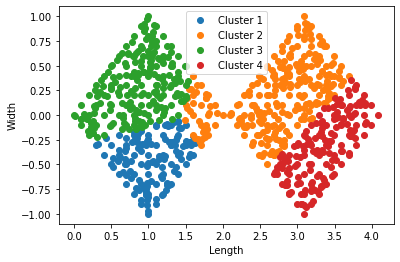

Final Clusters:


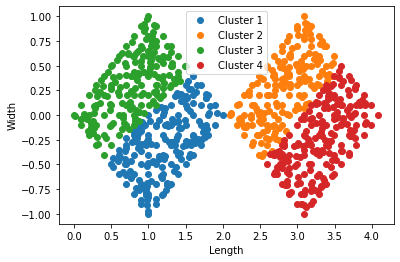

In [12]:
#   k-means algorithm code

def kmeansalgo(array, k=4, iterations=100):
    iterationSTDs = []

    indices = np.random.randint(0, array.shape[0], k)
    centroids = array[indices]
    # print(centroids)
    clusters = formClusters(centroids, array)
    print("Initial Clusters:")
    plot(clusters)
    for i in range(iterations):
        centroids = genCentroids(clusters)
        # print(centroids)
        clusters = formClusters(centroids, array)

    print("Final Clusters:")
    plot(clusters)

kmeansalgo(array)

